# Checking the difference in the prediction, number of times one experiment over and under predicts

## imports

In [1]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import mxnet as mx
from mxnet import gluon

In [2]:
from scr.RQ1_forecast import *

In [3]:
num_samples = 100

In [4]:
data_address1 = '/home/dev/deepts/experiments/deep_ar/solar_nips/1B'

# metric section

In [5]:
# loop through all the runs in the results folder and read the metric dataframe
metrics_list1 = read_csv_result('metrics.csv', data_address1)

201it [00:00, 41247.38it/s]
100%|###########| 100/100 [00:01<00:00, 50.14it/s]


In [6]:
metrics_list1[0]

,Unnamed: 0,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,0,0.0,2406.238444,690.392090,1791.799927,74.658330,27.386858,1.050370,0.177660,1.278620,NaN,13.442281,251.780148,0.041667,690.392071,0.125000,390.105266,0.666667
1,1,1.0,889.391276,353.345947,947.400024,39.475001,10.930666,1.346921,0.154948,1.346027,NaN,16.257546,154.633572,0.000000,353.345956,0.125000,175.378081,0.458333
2,2,2.0,1319.377686,423.838745,512.900024,21.370834,13.243057,1.333525,0.470909,1.592738,NaN,31.889936,127.166825,0.000000,423.838756,0.208333,461.592950,0.625000
3,3,3.0,204.112996,158.551880,265.350006,11.056250,12.117417,0.545193,0.406283,1.511581,NaN,9.806225,78.904303,0.000000,158.551867,0.083333,144.264436,0.708333
4,4,4.0,2423.425456,647.345825,1342.600098,55.941671,23.641898,1.140887,0.349784,1.346215,NaN,14.978648,228.887688,0.083333,647.345860,0.250000,397.664903,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,954,954.0,559.268433,367.633362,243.200012,10.133334,13.015347,1.176923,4.775916,1.583404,NaN,4.278256,42.211164,0.083333,367.633370,0.458333,130.534813,0.791667
955,955,955.0,562.260946,359.947632,294.750000,12.281250,11.095133,1.351747,2.141971,1.564617,NaN,5.949468,64.802851,0.166667,359.947621,0.416667,145.052264,0.791667
956,956,956.0,358.464844,305.710663,308.750000,12.864583,12.937663,0.984563,2.383355,1.505265,NaN,2.691009,38.386842,0.000000,305.710667,0.458333,125.349386,0.791667
957,957,957.0,462.174967,338.255524,147.899994,6.162500,11.797566,1.194651,11.230508,1.614165,NaN,4.303724,42.802697,0.083333,338.255521,0.500000,144.319619,0.791667


In [7]:
def sort_metric_df(my_metrics_df):
    my_metrics_df.sort_values(by=['item_id', 'Unnamed: 0'], inplace=True)
    my_metrics_df.reset_index(drop=True, inplace=True)
    return my_metrics_df

In [8]:
def sort_metric_list(my_metric_list):
    for my_metric_df in my_metric_list:
        my_metric_df = sort_metric_df(my_metric_df)

In [9]:
sort_metric_list(metrics_list1)


In [10]:
metrics_list1[0]

,Unnamed: 0,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,0,0.0,2406.238444,690.392090,1791.799927,74.658330,27.386858,1.050370,0.177660,1.278620,NaN,13.442281,251.780148,0.041667,690.392071,0.125000,390.105266,0.666667
1,1,1.0,889.391276,353.345947,947.400024,39.475001,10.930666,1.346921,0.154948,1.346027,NaN,16.257546,154.633572,0.000000,353.345956,0.125000,175.378081,0.458333
2,2,2.0,1319.377686,423.838745,512.900024,21.370834,13.243057,1.333525,0.470909,1.592738,NaN,31.889936,127.166825,0.000000,423.838756,0.208333,461.592950,0.625000
3,3,3.0,204.112996,158.551880,265.350006,11.056250,12.117417,0.545193,0.406283,1.511581,NaN,9.806225,78.904303,0.000000,158.551867,0.083333,144.264436,0.708333
4,4,4.0,2423.425456,647.345825,1342.600098,55.941671,23.641898,1.140887,0.349784,1.346215,NaN,14.978648,228.887688,0.083333,647.345860,0.250000,397.664903,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,954,954.0,559.268433,367.633362,243.200012,10.133334,13.015347,1.176923,4.775916,1.583404,NaN,4.278256,42.211164,0.083333,367.633370,0.458333,130.534813,0.791667
955,955,955.0,562.260946,359.947632,294.750000,12.281250,11.095133,1.351747,2.141971,1.564617,NaN,5.949468,64.802851,0.166667,359.947621,0.416667,145.052264,0.791667
956,956,956.0,358.464844,305.710663,308.750000,12.864583,12.937663,0.984563,2.383355,1.505265,NaN,2.691009,38.386842,0.000000,305.710667,0.458333,125.349386,0.791667
957,957,957.0,462.174967,338.255524,147.899994,6.162500,11.797566,1.194651,11.230508,1.614165,NaN,4.303724,42.802697,0.083333,338.255521,0.500000,144.319619,0.791667


# Forecast section

In [11]:
# read the forecast file
forcast_list1 = read_csv_result('forecasts.csv', data_address1, n_files=100)
# forcast_list2 = read_csv_result('forecasts.csv', data_address2, n_files=100)

201it [00:00, 38240.73it/s]
100%|###########| 100/100 [00:32<00:00,  3.06it/s]


In [12]:
len(forcast_list1)

100

In [13]:
# sort the forcast lists based on their original time series
sorted_forcast_list1 = get_sorted_csv(forcast_list1, num_time_series=137)
# sorted_forcast_list2 = get_sorted_csv(forcast_list2)

In [14]:
sorted_forcast_list1[0].head(26)

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample94,sample95,sample96,sample97,sample98,sample99,train_series_number,mean,std,normal_std
0,1,0,2006-10-20 01:00:00,0.00,-0.742047,-0.203200,-0.277325,-0.551367,-0.600623,-1.001803,...,-0.183558,-0.918473,0.073991,-0.239781,-1.187907,-0.339510,0,-0.690439,0.818312,0.115118
1,1,0,2006-10-20 02:00:00,0.00,-1.743378,-0.214946,-0.772641,-1.029578,-0.487901,-0.731136,...,-1.525399,-0.954588,-0.361859,-1.064016,-0.796125,-0.307453,0,-0.579343,0.929312,0.098718
2,1,0,2006-10-20 03:00:00,0.00,-1.073546,-0.816910,-0.820820,-0.695998,0.600383,-0.259915,...,-1.300757,-1.203200,-1.516567,-0.788018,-0.995302,-0.636260,0,-0.562992,0.590150,0.133140
3,1,0,2006-10-20 04:00:00,0.00,-0.047769,-1.032798,-0.845372,-0.491349,-0.046801,-0.151636,...,-0.739919,-0.736194,-0.341169,-0.545968,-0.210840,-0.739056,0,-0.545746,0.736976,0.138725
4,1,0,2006-10-20 05:00:00,0.00,-3.375780,-0.162367,-0.856468,-0.327593,-0.416783,-1.416170,...,-0.807462,-0.055793,-1.886182,-0.685818,-6.461552,2.887984,0,-0.137319,1.825014,0.133739
5,1,0,2006-10-20 06:00:00,69.65,20.887892,19.879480,44.526966,35.604070,33.201927,35.540977,...,33.212310,29.037287,21.235817,31.657604,21.649473,37.599728,0,33.873666,13.857271,0.116768
6,1,0,2006-10-20 07:00:00,110.60,72.937070,68.177850,132.991100,98.548195,87.105850,96.002030,...,100.031060,93.997990,80.236050,152.979400,92.748680,126.864845,0,103.275929,139.139987,0.087284
7,1,0,2006-10-20 08:00:00,94.50,125.290770,132.650240,206.126450,160.858980,180.584240,117.991910,...,138.001340,145.884350,207.118230,202.061100,121.407524,167.787500,0,146.696124,60.620644,0.121999
8,1,0,2006-10-20 09:00:00,101.80,148.674180,159.247800,205.257980,182.001570,193.244770,156.016200,...,156.147160,171.810300,176.580860,207.602750,136.163270,187.001420,0,167.050333,58.192935,0.151595
9,1,0,2006-10-20 10:00:00,177.45,232.513120,248.403730,123.401780,150.204320,181.100920,148.637800,...,-11.351626,154.356300,124.503330,183.444350,135.618260,152.476070,0,148.827705,63.037364,0.157125


In [15]:
target_forcast_series = get_forcast_target(forcast_list1)

In [16]:
# this dataframe is just one time series
ts_number = 0
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_number)

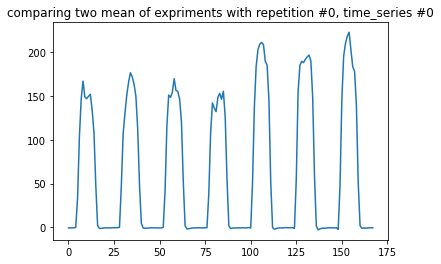

In [17]:
# plot mean of only one time series
rep_no = 0
plt.title(f'comparing two mean of expriments with repetition #{rep_no}, time_series #{ts_number}')
ts_list1[rep_no]['mean'].plot()
# ts_list2[rep_no]['mean'].plot()

## We want to compare the number of time points on experiment underpredict. 
Question is are experiments with worst MAPE, underpredict most of the time?

In [28]:
# question: is the worse one always underpredict?
# we need to use compare means, but I need to change the function
# experiment A
expA_worst_compare = (sorted_forcast_list1[9]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_best_compare = (sorted_forcast_list1[64]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_highest_compare = (sorted_forcast_list1[17]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_lowest_compare = (sorted_forcast_list1[40]['mean'] < sorted_forcast_list1[0]['target']).value_counts()

# # experiment B
# expB_worst_compare = (sorted_forcast_list2[63]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
# expB_best_compare = (sorted_forcast_list2[68]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
# expB_highest_compare = (sorted_forcast_list2[8]['mean'] < sorted_forcast_list2[0]['target']).value_counts()

In [29]:
# outputs the proportion of true experiences over all the experiences
def compare_two_series(seriesTrue, seriesFalse):
    return seriesTrue/(seriesTrue + seriesFalse)

underpred_A_best = compare_two_series(expA_best_compare[True], expA_best_compare[False])
underpred_A_worst = compare_two_series(expA_worst_compare[True], expA_worst_compare[False])
underpred_A_highest = compare_two_series(expA_highest_compare[True], expA_highest_compare[False])
underpred_A_lowest = compare_two_series(expA_lowest_compare[True], expA_lowest_compare[False])


print(f'percentage of underprediction of worst repetition for experiment A = {underpred_A_worst}')
print(f'percentage of underprediction of best repetition for experiment A = {underpred_A_best}')
print(f'percentage of underprediction of highest repetition for experiment A = {underpred_A_highest}')
print(f'percentage of underprediction of lowest repetition for experiment A = {underpred_A_lowest}')




percentage of underprediction of worst repetition for experiment A = 0.31017553006604104
percentage of underprediction of best repetition for experiment A = 0.3956378171706639
percentage of underprediction of highest repetition for experiment A = 0.21367744177963155
percentage of underprediction of lowest repetition for experiment A = 0.8069169273548835


In [30]:
# find the one with the highest prediction
get_highest_prediction_id(sorted_forcast_list1, high_flag=False), get_highest_prediction_id(sorted_forcast_list1, high_flag=True)

(40, 17)

In [31]:
# find max difference between each experiments with itself and also combined
# combined_forecast_list = sorted_forcast_list1 + sorted_forcast_list2
# combined_max_tuple, _ = get_max_difference_pair(combined_forecast_list)
expA_max_tuple, _ = get_max_difference_pair(sorted_forcast_list1)
# expB_max_tuple, _ = get_max_difference_pair(sorted_forcast_list2)

In [22]:
print(f'the most different tuples of experiment A is: {expA_max_tuple}')
# print(f'the most different tuples of experiment B is: {expB_max_tuple}')
# print(f'the most different tuples of Combined experiments is: {combined_max_tuple}')

the most different tuples of experiment A is: (95, 67)


(10500.0, 10650.0)

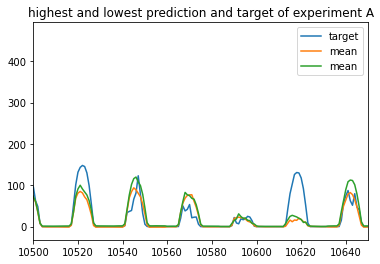

In [32]:
plt.title('highest and lowest prediction and target of experiment A')
sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[40]['mean'].plot(legend=True)
sorted_forcast_list1[17]['mean'].plot(legend=True)
plt.xlim([10500,10650])
# plt.ylim([0.04,0.24])

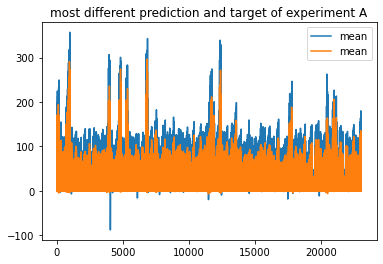

In [33]:
plt.title('most different prediction and target of experiment A')
# sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[95]['mean'].plot(legend=True)
sorted_forcast_list1[67]['mean'].plot(legend=True)
# plt.xlim([10500,10650])
# plt.ylim([0.04,0.24])

## take the average of experiment A and B and plot them
the reults show that after running 100 times, the average of results are converging.

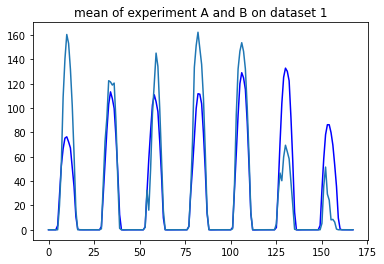

In [27]:
ts_no = 1

# calculate the mean of all means for computer A
ts_list1 = get_ts_list(sorted_forcast_list1, ts_no)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_no)


means_A = np.zeros((len(ts_list1) , ts_list1[0]['mean'].shape[0]))
# means_B = np.zeros((len(ts_list2) , ts_list2[0]['mean'].shape[0]))


for idx, ts_df1 in enumerate(ts_list1):
    means_A[idx] = ts_df1['mean'].to_numpy()
# for idx, ts_df2 in enumerate(ts_list2):
#     means_B[idx] = ts_df2['mean'].to_numpy()

mean_means_A = means_A.mean(axis=0)
# mean_means_B = means_B.mean(axis=0)

plt.title(f'mean of experiment A and B on dataset {ts_no}')
plt.plot(mean_means_A, color='blue')
# plt.plot(mean_means_B, color='red')
plt.plot(ts_list1[0]['target'].to_numpy())
# mean1 = ts_list1[0]['mean'].to_numpy()
# mean1.shape